# Time Series

In [1]:
# import package
import pandas as pd
import seaborn as sns

## (1) Oslo city bike

**(1.1) Download the August 2021 city bike data here https://oslobysykkel.no/en/open-data/historical. Import the dataset and set the column <code>started_at</code> as DatetimeIndex.**<br> 
(The description of each column can be found on the same page.)

In [2]:
# put your code here
bike_raw_df = pd.read_csv("../dataset/oslo_bike.csv", parse_dates = ["started_at"], index_col  = [0])
bike_raw_df.head(5)

,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
started_at,,,,,,,,,,,,
2021-08-01 03:02:57.720000+00:00,2021-08-01 03:12:52.597000+00:00,594,446,Bislett Stadion,ved rundkjøringen,59.925471,10.731219,459,Valkyrieplassen,ved Bogstadveien,59.928132,10.718420
2021-08-01 03:10:11.182000+00:00,2021-08-01 03:27:21.284000+00:00,1030,462,Stensparken,ved Sporveisgata,59.927140,10.730981,735,Oslo Hospital,ved trikkestoppet,59.903213,10.767344
2021-08-01 03:11:51.662000+00:00,2021-08-01 03:22:59.895000+00:00,668,624,Dælenenggata,ved Fagerheimgata,59.928750,10.767546,581,Jordalgata,ved Galgeberg busstopp,59.908227,10.781088
2021-08-01 03:19:27.151000+00:00,2021-08-01 03:42:37.826000+00:00,1390,391,St. Hanshaugen park vest,ved busstoppet Colletts gate,59.926871,10.738463,737,Munkegata,langs Oslo gate,59.908255,10.767800
2021-08-01 03:21:52.994000+00:00,2021-08-01 03:30:01.358000+00:00,488,499,Bjerregaards gate,ovenfor Fredrikke Qvams gate,59.925488,10.746058,475,Hausmanns bru,langs Nylandsveien,59.914651,10.759872


**(1.2) Select a subset with two columns: <code>duration</code> and <code>start_station_name</code>. Use this subset to solve the following tasks.**<br>
Hint: <code>copy()</code>

In [3]:
# put your code here
bike_df = bike_raw_df[["duration", "start_station_name"]].copy()
bike_df.head(5)

,duration,start_station_name
started_at,,
2021-08-01 03:02:57.720000+00:00,594,Bislett Stadion
2021-08-01 03:10:11.182000+00:00,1030,Stensparken
2021-08-01 03:11:51.662000+00:00,668,Dælenenggata
2021-08-01 03:19:27.151000+00:00,1390,St. Hanshaugen park vest
2021-08-01 03:21:52.994000+00:00,488,Bjerregaards gate


**(1.3) Show the riding time for each trip between 8 a.m. and 11 a.m. on August 10.**<br>
Hint: Use column <code>duration</code><br>
Setting: figsize = (18,3)

<AxesSubplot:xlabel='started_at'>

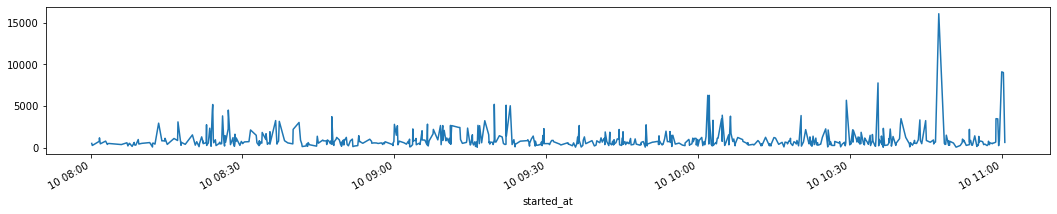

In [4]:
# put your code here
bike_df.loc["2021-08-10 08:00":"2021-08-10 11:00","duration"].plot(figsize = (18,3))

**(1.4) How many trips departed from <code>Olaf Ryes plass</code> Station on August 10?**

In [5]:
# put your code here
bike_df[bike_df.start_station_name == "Olaf Ryes plass"].loc["2021-08-10",:].shape[0]

80

**(1.5) Calculate the total riding time per day. Use a horizontal bar chart to display the result.**

<AxesSubplot:ylabel='started_at'>

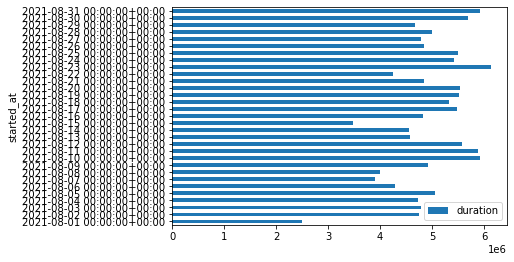

In [6]:
# put your code here
bike_df.resample("D").sum().plot(kind = "barh")

**(1.5) Extract the day of the week from the DatetimeIndex and add it a as new column named <code>weekday</code>.**

In [7]:
# put your code here
bike_df["weekday"] = bike_df.index.day_name()
bike_df.head(5)

,duration,start_station_name,weekday
started_at,,,
2021-08-01 03:02:57.720000+00:00,594,Bislett Stadion,Sunday
2021-08-01 03:10:11.182000+00:00,1030,Stensparken,Sunday
2021-08-01 03:11:51.662000+00:00,668,Dælenenggata,Sunday
2021-08-01 03:19:27.151000+00:00,1390,St. Hanshaugen park vest,Sunday
2021-08-01 03:21:52.994000+00:00,488,Bjerregaards gate,Sunday


**(1.6) Group the data from Auguest 1 to 28 by the column <code>weekday</code>. Calcuate the number of trips for each group. Which day of the week has the most trips?**

In [8]:
# put your code here
bike_df.loc["2021-08-01":"2021-08-28",:].groupby("weekday").size()

weekday
Friday       26194
Monday       27157
Saturday     20297
Sunday       15411
Thursday     28360
Tuesday      28598
Wednesday    28433
dtype: int64

**Write you answer here:** Tuesday 
    

**(1.7) Which day of the week has the longest average riding time?**<br>
Hint: Use the data from Auguest 1 to 28.

In [9]:
# put your code here
bike_df.loc["2021-08-01":"2021-08-28",:].groupby("weekday").mean()

,duration
weekday,
Friday,731.788463
Monday,760.088338
Saturday,901.435877
Sunday,922.493803
Thursday,739.593441
Tuesday,755.376005
Wednesday,754.030000


**Write you answer here:** Sunday
    

**(1.8) Count the number of departures from the following stations on each day of the week in August.**<br>
<code>Alexander Kiellands Plass, Ringnes Park, Olaf Ryes plass, Tøyen skole, Bislett Stadion, Jernbanetorget, BI Nydalen.</code>   
Expected result:

||Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday|
|-:-|-:-|-:-|-:-|-:-|-:-|-:-|-:-|
|**Alexander Kiellands Plass**|473|512|...|...|...|...|...|   
|**BI Nydalen**|238|...|...|...|...|...|...|   
|**Bislett Stadion**|...|...|...|...|...|...|     
|**Jernbanetorget**|...|...|...|...|...|...|     
|**Olaf Ryes plass**|...|...|...|...|...|...|    
|**Ringnes Park**|...|...|...|...|...|...|    
|**Tøyen skole**|...|...|...|...|...|...|    

In [10]:
# put your code here
bike_df_sub = bike_df[bike_df.start_station_name.isin(["Alexander Kiellands Plass", "Ringnes Park", "Olaf Ryes plass", "Tøyen skole", "Bislett Stadion", "Jernbanetorget", "BI Nydalen"])]
bike_ct = pd.crosstab(bike_df_sub["start_station_name"], bike_df_sub["weekday"])
bike_ct = bike_ct[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]
bike_ct

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
start_station_name,,,,,,,
Alexander Kiellands Plass,473,512,463,415,403,284,240
BI Nydalen,238,230,168,183,149,114,195
Bislett Stadion,356,391,285,355,300,201,186
Jernbanetorget,279,309,249,269,237,171,193
Olaf Ryes plass,372,455,367,347,329,325,273
Ringnes Park,458,487,396,389,364,286,251
Tøyen skole,403,419,310,337,286,213,236


**(1.9) Use a heatmap to display the result obtained in (1.8). List the two stations with the most trips on Tuesday.**

<AxesSubplot:xlabel='weekday', ylabel='start_station_name'>

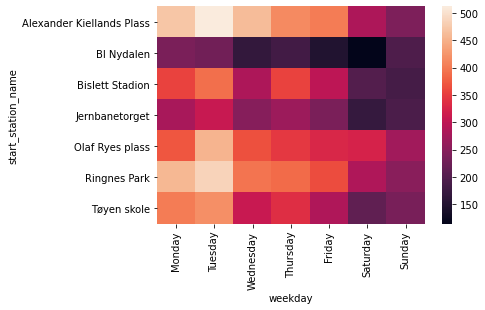

In [11]:
# put your code here
sns.heatmap(bike_ct)

**Write you answer here:** "Alexander Kiellands Plass" and "Ringnes Park"
    

**(1.10) Calculate the number of trips in each hour on August 10.**

In [12]:
# put your code here
bike_df.loc["2021-08-10"].resample("H").size()

started_at
2021-08-10 03:00:00+00:00     26
2021-08-10 04:00:00+00:00    135
2021-08-10 05:00:00+00:00    540
2021-08-10 06:00:00+00:00    715
2021-08-10 07:00:00+00:00    315
2021-08-10 08:00:00+00:00    182
2021-08-10 09:00:00+00:00    245
2021-08-10 10:00:00+00:00    256
2021-08-10 11:00:00+00:00    315
2021-08-10 12:00:00+00:00    387
2021-08-10 13:00:00+00:00    550
2021-08-10 14:00:00+00:00    882
2021-08-10 15:00:00+00:00    691
2021-08-10 16:00:00+00:00    531
2021-08-10 17:00:00+00:00    460
2021-08-10 18:00:00+00:00    390
2021-08-10 19:00:00+00:00    319
2021-08-10 20:00:00+00:00    213
2021-08-10 21:00:00+00:00    112
2021-08-10 22:00:00+00:00     61
Freq: H, dtype: int64

**(1.11) Use a horizontal bar chart to display the result obtained in (1.10).**

<AxesSubplot:ylabel='started_at'>

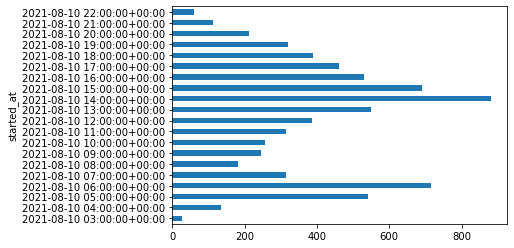

In [13]:
# put your code here
bike_df.loc["2021-08-10"].resample("H").size().plot(kind="barh")

## (2) Complains
In the US, 311 is a non-emergency phone number that people can call in many cities to find information about services, make complaints, or report problems like graffiti or road damage.


**(2.1) Import the dataset <code>complaints.csv</code>. Set the column <code>Created Date</code> as DatetimeIndex.**<br>

In [14]:
# put your code here
complaint_df = pd.read_csv("../dataset/complaints.csv", parse_dates = ["Created Date"], index_col = [1])
complaint_df.head(5)

C:\BI-Apps\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2013-10-31 02:08:41,26589651,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
2013-10-31 02:01:04,26593698,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2013-10-31 02:00:24,26594139,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
2013-10-31 01:56:23,26595721,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023.0,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
2013-10-31 01:53:44,26590930,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027.0,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


**(2.2) Sort the dataframe from oldest to newest.**<br>
Hint: <code>DataFrame.sort_index(inplace = True)</code>

In [15]:
# put your code here
complaint_df.sort_index(inplace = True)
complaint_df.head(5)

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2013-10-04 00:00:10,26428033,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236.0,1259 EAST 94 STREET,EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024,-73.900717,"(40.640024057399216, -73.90071711703163)"
2013-10-04 00:00:28,26426115,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226.0,1233 FLATBUSH AVENUE,FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"
2013-10-04 00:00:45,26428987,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016.0,344 EAST 28 STREET,EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
2013-10-04 00:01:05,26428083,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
2013-10-04 00:01:13,26426013,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**(2.2) Select the complaint data handled by <code>NYPD</code> with two columns: <code>Closed Date, Complaint Type</code>. Use this subset to solve the following tasks.**<br>
Hint: Use column <code>Agency</code> and make a copy.

In [16]:
# put your code here
nypd_df = complaint_df[complaint_df.Agency == "NYPD"].loc[:,["Closed Date", "Complaint Type"]].copy()
nypd_df.head(5)

,Closed Date,Complaint Type
Created Date,,
2013-10-04 00:00:10,10/04/2013 01:20:52 AM,Blocked Driveway
2013-10-04 00:00:28,10/04/2013 04:17:32 AM,Noise - Commercial
2013-10-04 00:00:45,10/04/2013 01:25:01 AM,Noise - Street/Sidewalk
2013-10-04 00:01:05,10/04/2013 02:13:50 AM,Illegal Parking
2013-10-04 00:03:00,10/04/2013 02:14:57 AM,Noise - Commercial


**(2.3) Calculate the number of complaints in each day and display the result with a line chart.**<br>
Setting: figsize = (15,3), marker = "o"

<AxesSubplot:xlabel='Created Date'>

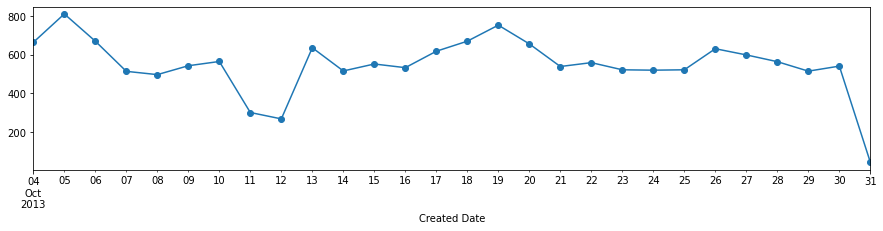

In [17]:
# put your code here
nypd_df.resample("D").size().plot(figsize = (15,3), marker = "o")

**(2.4) What are the top five types of complaints?**

In [18]:
# put your code here
nypd_df["Complaint Type"].value_counts().head(5)

Blocked Driveway           4590
Illegal Parking            3343
Noise - Commercial         2578
Noise - Street/Sidewalk    1928
Derelict Vehicle            803
Name: Complaint Type, dtype: int64

**(2.5) Extract the hour from DatetimeIndex and add it as a new column named <code>Hour</code>.**

In [19]:
# put your code here
nypd_df["Hour"] = nypd_df.index.hour
nypd_df.head(5)

,Closed Date,Complaint Type,Hour
Created Date,,,
2013-10-04 00:00:10,10/04/2013 01:20:52 AM,Blocked Driveway,0
2013-10-04 00:00:28,10/04/2013 04:17:32 AM,Noise - Commercial,0
2013-10-04 00:00:45,10/04/2013 01:25:01 AM,Noise - Street/Sidewalk,0
2013-10-04 00:01:05,10/04/2013 02:13:50 AM,Illegal Parking,0
2013-10-04 00:03:00,10/04/2013 02:14:57 AM,Noise - Commercial,0


**(2.6) Use a heatmap to show the number of complaints of each complaint type at different times. What types of complaints are reported most at midnight?**

<AxesSubplot:xlabel='Hour', ylabel='Complaint Type'>

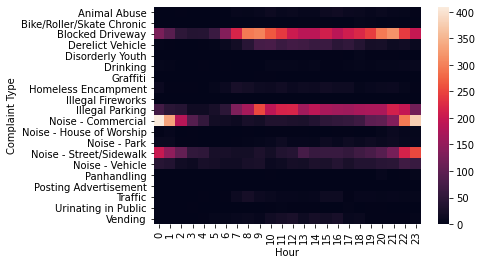

In [20]:
# put your code here
type_hr_ct = pd.crosstab(nypd_df["Complaint Type"], nypd_df["Hour"])
sns.heatmap(type_hr_ct)

**Write you answer here:** Noise - Commercial
    